In [2]:
from pipeline import *
from utils import *

### Subtract background for SE

In [3]:
df0 = DeepFrame("/home/qliu/data/2152921p.deep.fits", name='A2390C')
df0.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2064                                                  
EXTEND  =                    T                                                  
PROGRAM = 'ORB v2.1.0'         / Thomas Martin: thomas.martin.1@ulaval.ca       
DATE    = '2017-09-28'         / Creation date                                  
MASK    = 'False   '                                                            
COMMENT                                                                         
COMMENT General                                                                 
COMMENT -------                                                                 
COMMENT                     

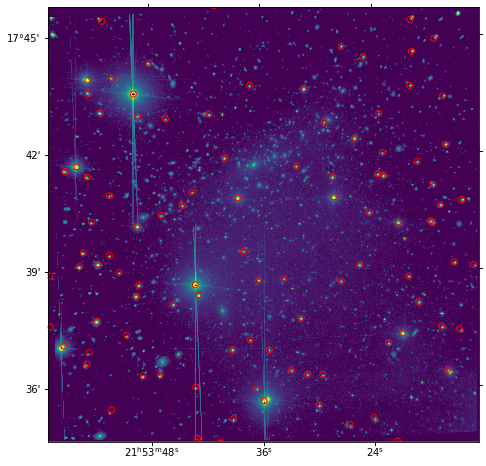

In [4]:
tab_sdss = df0.crossmatch_sdss(radius=7*u.arcmin,mag_max=18)
coords = np.vstack([np.array(tab_sdss["RA_ICRS"]), np.array(tab_sdss["DE_ICRS"])]).T
star_pos = df0.wcs.wcs_world2pix(coords, 1)

plt.figure(figsize=(8,8))
ax = plt.subplot(projection=df0.wcs)
plt.scatter(star_pos[:,0], star_pos[:,1], facecolor="none", edgecolor="r")
plt.imshow(df0.image, norm=norm1, origin="lower", vmin=np.median(df0.image), vmax=1e4)

Saved background subtracted image as A2390C_DF_noSE.fits


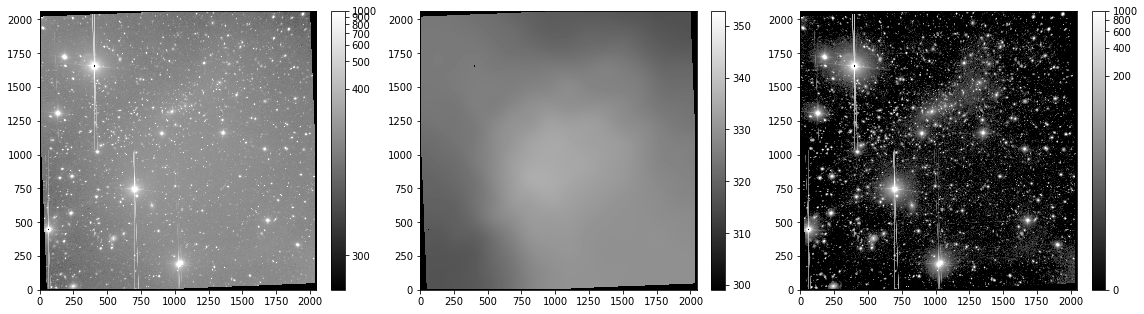

In [5]:
df0.make_mask_edge(save_path='./proc/')
df0.subtract_background(display=True, save=True, save_path='./proc/', suffix='_noSE')

### Run SE for a second time to derive seeing and more accurate background

In [28]:
df = DeepFrame("./proc/A2390C_DF_noSE.fits", name='A2390C',
               Tab_SE='./A2390C/SE_DF/A2390C_DF_run1m.cat',
               seg_map='./A2390C/SE_DF/segm_m1.fits',
               mask_edge="./proc/A2390C_edge.fits")

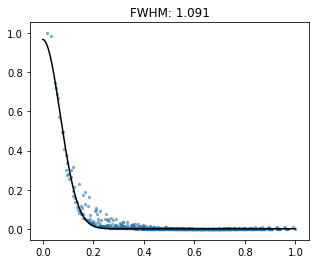

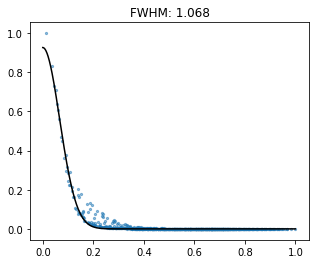

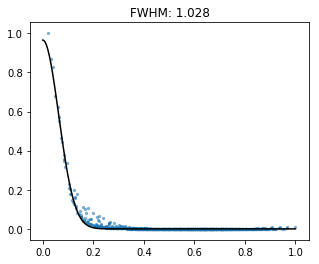

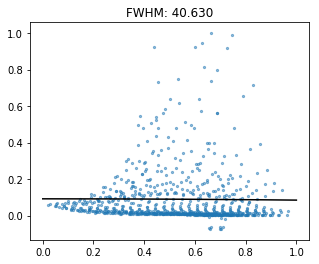

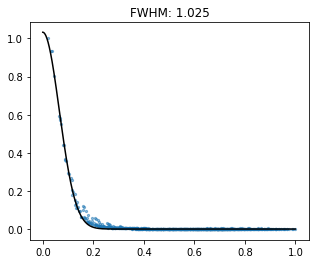

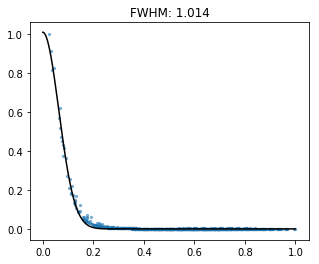

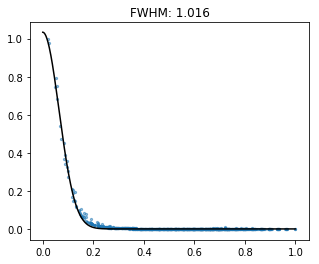

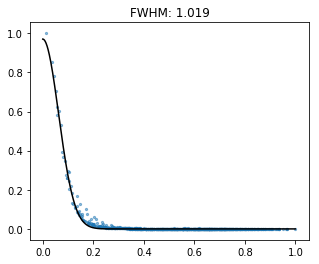

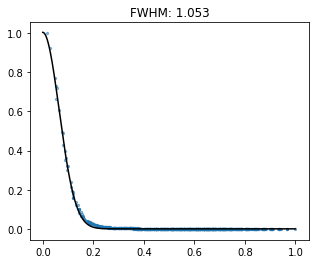

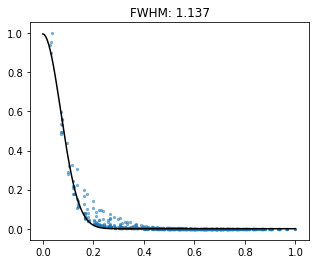

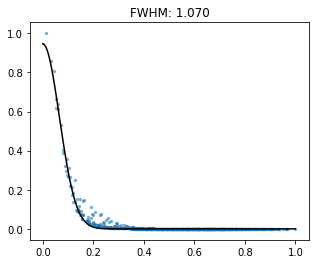

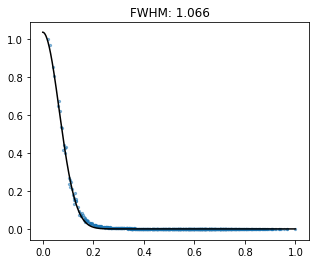

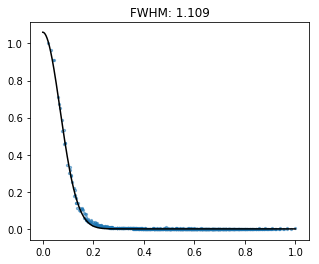

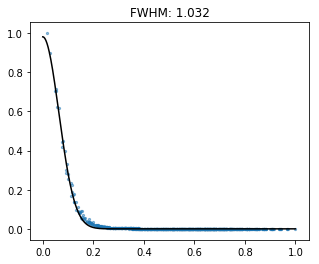

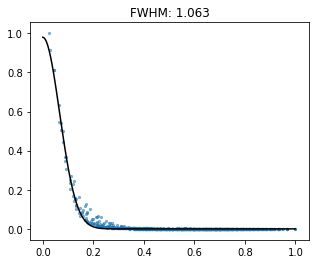

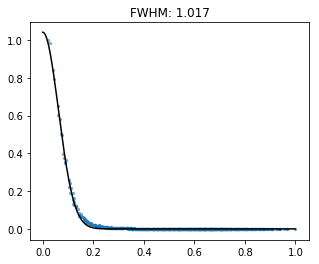

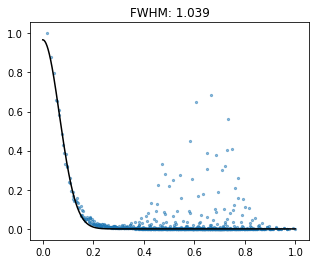

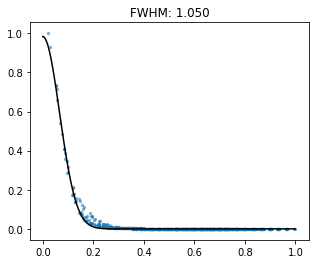

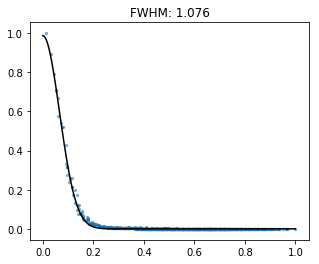

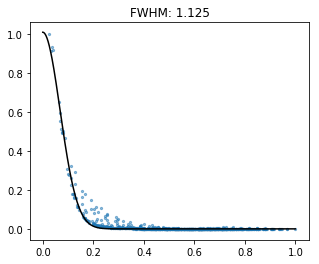

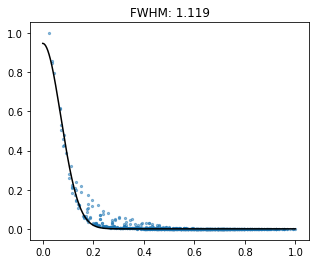

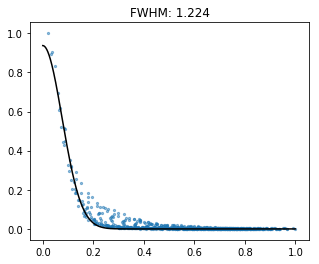

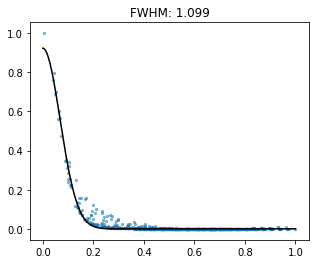

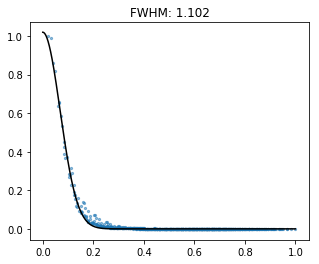

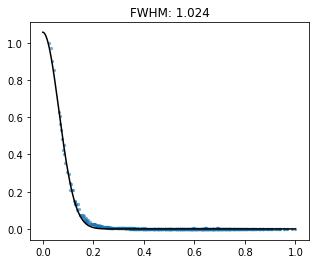

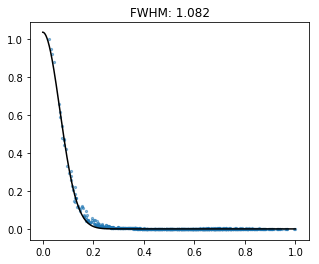

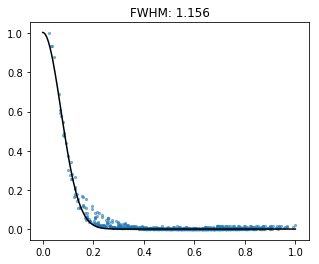

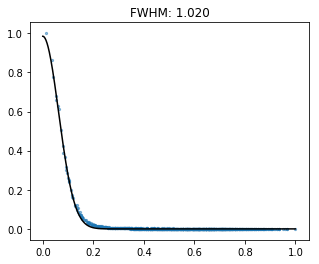

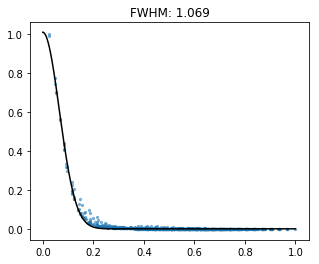

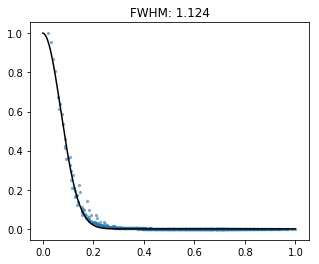

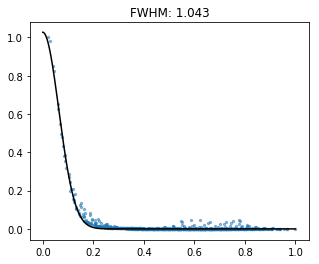

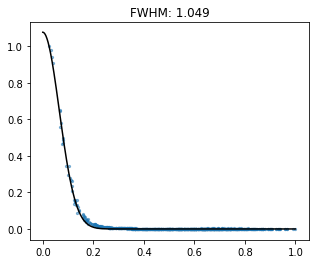

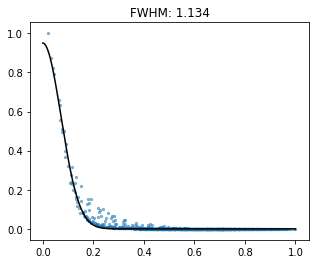

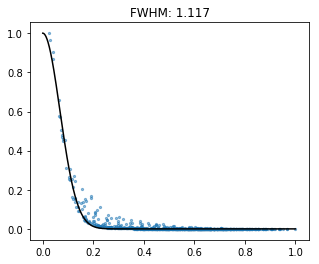

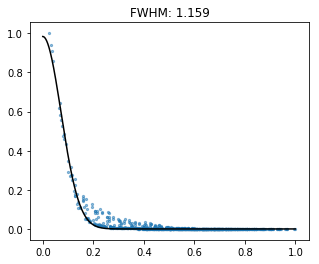

Median seeing FWHM in arcsec: 1.069


In [29]:
df.calculate_seeing()

Saved background subtracted image as A2390C_DF.fits


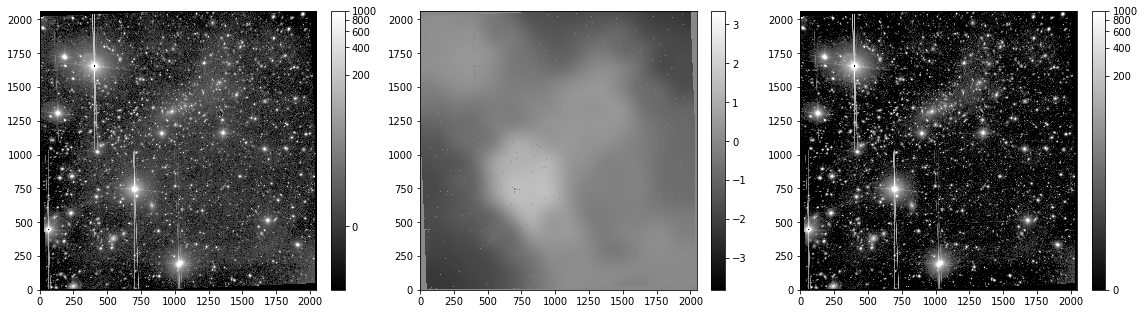

In [30]:
df.subtract_background(display=True, save=True, save_path='./proc/')

<Figure size 864x648 with 0 Axes>

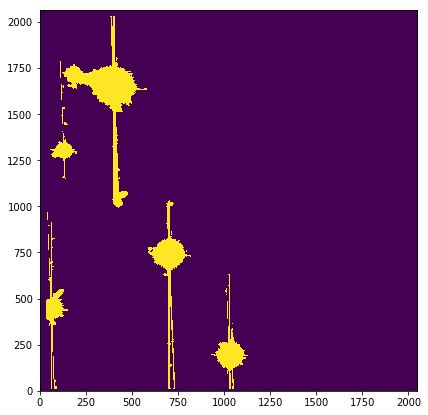

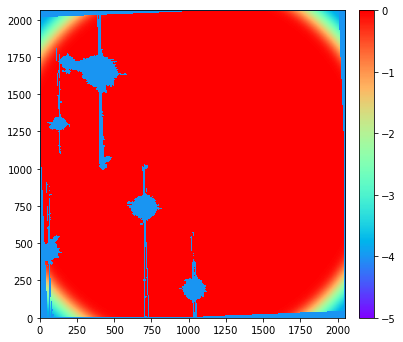

In [32]:
df.make_mask_streak("./proc/A2390C_DF.fits", threshold=3, shape_cut=0.15, area_cut=500)
df.make_weight_map(thre=0.58, wt_min=1e-4, save_path="./proc/")